<a href="https://colab.research.google.com/github/miladziekanowska/stock-market-forecast-project/blob/main/Technical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installing libraries and fixing problems with Talib ;)**

In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar xvzf ta-lib-0.4.0-src.tar.gz
import os
os.chdir('ta-lib')
!./configure --prefix=/usr
!make
!sudo make install
os.chdir('../')
!pip install TA-Lib

In [ ]:
pip install Yahoo_fin


In [3]:
import datetime as dt
import pandas as pd
import numpy as np
import yahoo_fin.stock_info as yh
import talib as ta
import matplotlib.pyplot as plt
import pandas_datareader as web
import matplotlib.dates as mdates

In [ ]:
ticker_list = yh.tickers_dow()
historical_datas = {}
for ticker in ticker_list:
    historical_datas[ticker] = yh.get_data(ticker, start_date="13/07/1993", end_date='now', index_as_date = True, interval="1d")

In [5]:
historical_datas['AAPL']

,open,high,low,close,adjclose,volume,ticker
1993-07-13,0.345982,0.345982,0.330357,0.332589,0.273418,158110400,AAPL
1993-07-14,0.328125,0.334821,0.319196,0.332589,0.273418,246299200,AAPL
1993-07-15,0.332589,0.337054,0.314732,0.319196,0.262408,338038400,AAPL
1993-07-16,0.254464,0.264509,0.236607,0.245536,0.201853,2120596800,AAPL
1993-07-19,0.250000,0.256696,0.227679,0.228795,0.188090,806232000,AAPL
...,...,...,...,...,...,...,...
2023-08-07,182.130005,183.130005,177.350006,178.850006,178.850006,97576100,AAPL
2023-08-08,179.690002,180.270004,177.580002,179.800003,179.800003,67823000,AAPL
2023-08-09,180.869995,180.929993,177.009995,178.190002,178.190002,60378500,AAPL
2023-08-10,179.479996,180.750000,177.600006,177.970001,177.970001,54686900,AAPL


**RSI**

In [6]:
historical_datas['AAPL']['RSI'] = ta.RSI(historical_datas['AAPL']['close'].tail(400))

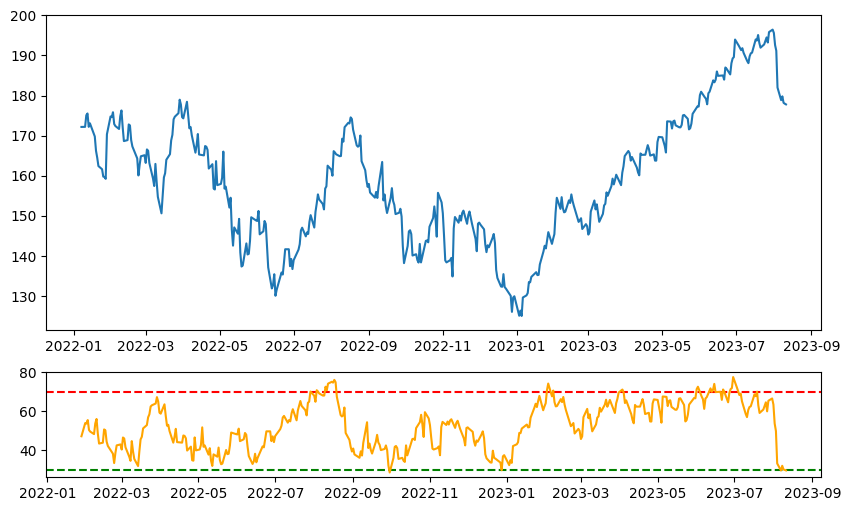

In [7]:
fig, axs = plt.subplots(2, 1, gridspec_kw={"height_ratios":[3,1]}, figsize=(10, 6))

axs[0].plot(historical_datas['AAPL']['close'].tail(400))
axs[1].axhline(y=70, color='r', linestyle='--')
axs[1].axhline(y=30, color='g', linestyle='--')
axs[1].plot(historical_datas['AAPL']['RSI'].tail(400), color='orange')

In [8]:
historical_datas['AAPL']['RSI'].head(15)

1993-07-13   NaN
1993-07-14   NaN
1993-07-15   NaN
1993-07-16   NaN
1993-07-19   NaN
1993-07-20   NaN
1993-07-21   NaN
1993-07-22   NaN
1993-07-23   NaN
1993-07-26   NaN
1993-07-27   NaN
1993-07-28   NaN
1993-07-29   NaN
1993-07-30   NaN
1993-08-02   NaN
Name: RSI, dtype: float64

In [9]:
historical_datas['AAPL']['RSI_signal'] = 'HOLD'  # Inicjalizacja sygnałów na 'HOLD'

rsi_values = historical_datas['AAPL']['RSI']
rsi_signals = []

#Dopisanie sygnałów do kolumny RSI_signals
for rsi in rsi_values:
    if rsi < 30:
        rsi_signals.append('BUY')
    elif rsi > 70:
        rsi_signals.append('SELL')
    else:
        rsi_signals.append('HOLD')

historical_datas['AAPL']['RSI_signal'] = rsi_signals


In [10]:
historical_datas['AAPL'].tail(30)

,open,high,low,close,adjclose,volume,ticker,RSI,RSI_signal
2023-06-30,191.630005,194.479996,191.259995,193.970001,193.970001,85069600,AAPL,77.610284,SELL
2023-07-03,193.779999,193.880005,191.759995,192.460007,192.460007,31458200,AAPL,72.194300,SELL
2023-07-05,191.570007,192.979996,190.619995,191.330002,191.330002,46920300,AAPL,68.350259,HOLD
2023-07-06,189.839996,192.020004,189.199997,191.809998,191.809998,45094300,AAPL,69.102827,HOLD
2023-07-07,191.410004,192.669998,190.240005,190.679993,190.679993,46778000,AAPL,65.173877,HOLD
2023-07-10,189.259995,189.990005,187.039993,188.610001,188.610001,59922200,AAPL,58.600955,HOLD
2023-07-11,189.160004,189.300003,186.600006,188.080002,188.080002,46638100,AAPL,57.015448,HOLD
2023-07-12,189.679993,191.699997,188.470001,189.770004,189.770004,60750200,AAPL,60.669619,HOLD
2023-07-13,190.500000,191.190002,189.779999,190.539993,190.539993,41342300,AAPL,62.244468,HOLD
2023-07-14,190.229996,191.179993,189.630005,190.690002,190.690002,41573900,AAPL,62.559009,HOLD


**MACD**

<ipython-input-25-84bafb70b62c>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  axs[1].plot(historical_datas['AAPL']['MACD_signalline'], 'b-', color='red')


<BarContainer object of 400 artists>

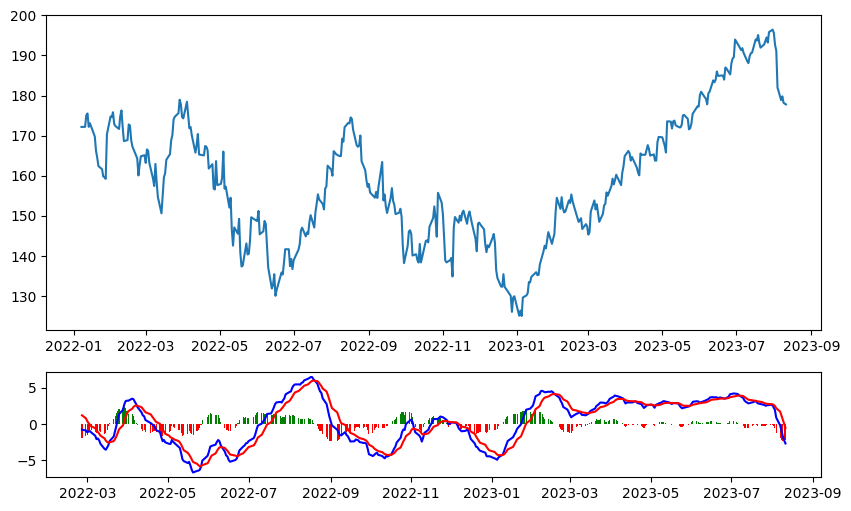

In [25]:
historical_datas['AAPL']['MACD'], historical_datas['AAPL']['MACD_signalline'], macd_hist = ta.MACD(historical_datas['AAPL']['close'].tail(400))

fig, axs = plt.subplots(2, 1, gridspec_kw={"height_ratios":[3,1]}, figsize=(10, 6))

c = ["red" if cl < 0 else "green" for cl in macd_hist]

axs[0].plot(historical_datas['AAPL']['close'].tail(400))
axs[1].plot(historical_datas['AAPL']['MACD'], 'b-')
axs[1].plot(historical_datas['AAPL']['MACD_signalline'], 'b-', color='red')
axs[1].bar(macd_hist.index, macd_hist, color=c)

In [30]:
historical_datas['AAPL'].tail(50)

,open,high,low,close,adjclose,volume,ticker,RSI,RSI_signal,SMA100,EMA100,WillR,WillR_signal,CCI,CCI_signals,MACD,MACD_signalline,MACD_signal
2023-06-01,177.699997,180.119995,176.929993,180.089996,180.089996,68901800,AAPL,71.373136,SELL,157.5576,161.188060,-0.309266,SELL,163.778062,SELL,2.811982,2.565895,HOLD
2023-06-02,181.029999,181.779999,179.259995,180.949997,180.949997,61945900,AAPL,72.629679,SELL,158.0656,161.579386,-7.306354,SELL,164.273302,SELL,3.071202,2.666956,HOLD
2023-06-05,182.630005,184.949997,178.039993,179.580002,179.580002,121946500,AAPL,67.543493,HOLD,158.5541,161.935834,-36.957987,HOLD,133.439663,HOLD,3.130007,2.759566,HOLD
2023-06-06,179.970001,180.119995,177.429993,179.210007,179.210007,64848400,AAPL,66.195255,HOLD,159.0113,162.277896,-39.504410,HOLD,72.356608,HOLD,3.110895,2.829832,HOLD
2023-06-07,178.440002,181.210007,177.320007,177.820007,177.820007,61944600,AAPL,61.248905,HOLD,159.4554,162.585661,-49.410903,HOLD,59.065615,HOLD,2.949586,2.853783,HOLD
2023-06-08,177.899994,180.839996,177.460007,180.570007,180.570007,50214900,AAPL,66.571016,HOLD,159.9135,162.941787,-30.353374,HOLD,69.382403,HOLD,3.008964,2.884819,HOLD
2023-06-09,181.500000,182.229996,180.630005,180.960007,180.960007,48870700,AAPL,67.257805,HOLD,160.3637,163.298583,-27.650674,HOLD,94.997789,HOLD,3.052306,2.918317,HOLD
2023-06-12,181.270004,183.889999,180.970001,183.789993,183.789993,54274900,AAPL,71.787304,SELL,160.8495,163.704354,-8.038837,SELL,119.811953,SELL,3.277234,2.990100,HOLD
2023-06-13,182.800003,184.149994,182.440002,183.309998,183.309998,54929100,AAPL,70.018050,SELL,161.3299,164.092584,-11.365213,SELL,121.148898,SELL,3.377821,3.067644,HOLD
2023-06-14,183.369995,184.389999,182.020004,183.949997,183.949997,57462900,AAPL,71.042818,SELL,161.7907,164.485800,-7.541481,SELL,116.749347,SELL,3.469190,3.147953,HOLD


In [28]:

signals = []
position = 'HOLD'

for i in range(len(historical_datas['AAPL'])):
    if i == 0:
        signals.append(position)
    else:
        if historical_datas['AAPL']['MACD'][i] > historical_datas['AAPL']['MACD_signalline'][i] and historical_datas['AAPL']['MACD'][i - 1] <= historical_datas['AAPL']['MACD_signalline'][i - 1]:
            position = 'BUY'
        elif historical_datas['AAPL']['MACD'][i] < historical_datas['AAPL']['MACD_signalline'][i] and historical_datas['AAPL']['MACD'][i - 1] >= historical_datas['AAPL']['MACD_signalline'][i - 1]:
            position = 'SELL'
        else:
            position = 'HOLD'

        signals.append(position)

historical_datas['AAPL']['MACD_signal'] = signals


SMA100 & EMA100

In [12]:
historical_datas['AAPL']['SMA100'] = ta.SMA(historical_datas['AAPL']['close'], 100)
historical_datas['AAPL']['EMA100'] = ta.EMA(historical_datas['AAPL']['close'], 100)

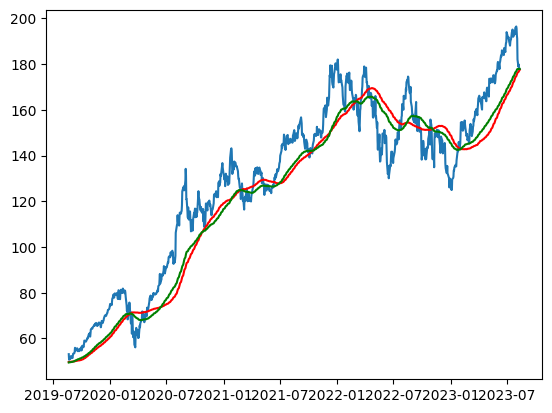

In [13]:
plt.plot(historical_datas['AAPL']['close'].tail(1000))
plt.plot(historical_datas['AAPL']['SMA100'].tail(1000), color="r")
plt.plot(historical_datas['AAPL']['EMA100'].tail(1000), color="g")

Tuataj podobnie jak z macd, nie do końca wiem jak stworzyć sygnały, bo to bardziej metoda wizualna.
Jutro wieczorem postaram się poszukać innych wskaźników.

Oczywiście są różne techniki, niektórzy biorą przecięcia EMA25 i EMA100, inni bazują na dłuższych/krótszych średnich, sam nigdy w życiu się tym nei bawiłem i nie wiem, czy to zostawić, czy poszukać czegoś innego, może bardziej liczbowego.

**Williams %R**

In [14]:
historical_datas['AAPL']['WillR'] = ta.WILLR(historical_datas['AAPL']['high'], historical_datas['AAPL']['low'], historical_datas['AAPL']['close'])

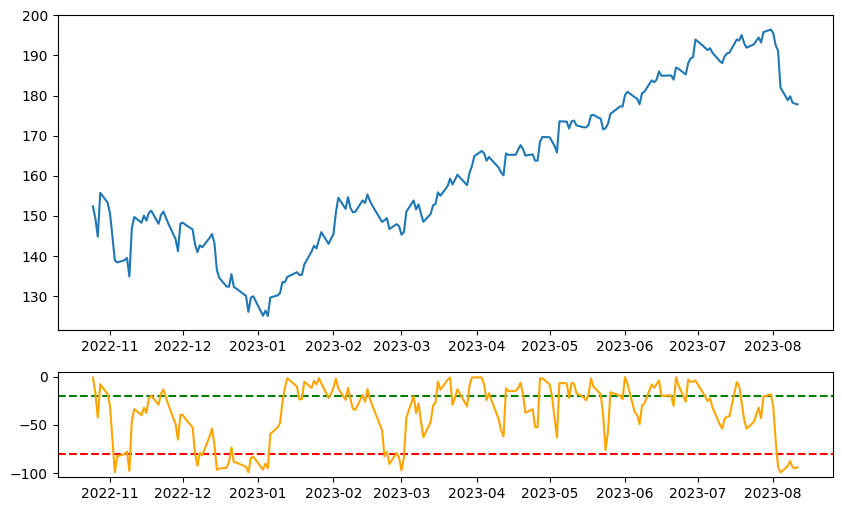

In [15]:
fig, axs = plt.subplots(2, 1, gridspec_kw={"height_ratios":[3,1]}, figsize=(10, 6))

axs[0].plot(historical_datas['AAPL']['close'].tail(200))
axs[1].axhline(y=-80, color='r', linestyle='--')
axs[1].axhline(y=-20, color='g', linestyle='--')
axs[1].plot(historical_datas['AAPL']['WillR'].tail(200), color='orange')

In [16]:
historical_datas['AAPL']['WillR_signal'] = 'HOLD'  # Inicjalizacja sygnałów na 'HOLD'

willr_values = historical_datas['AAPL']['WillR']
willr_signals = []

#Dopisanie sygnałów do kolumny willr_signals
for willr in willr_values:
    if willr < -80:
        willr_signals.append('BUY')
    elif willr > -20:
        willr_signals.append('SELL')
    else:
        willr_signals.append('HOLD')

historical_datas['AAPL']['WillR_signal'] = willr_signals

In [17]:
historical_datas['AAPL'].tail(50)

,open,high,low,close,adjclose,volume,ticker,RSI,RSI_signal,SMA100,EMA100,WillR,WillR_signal
2023-06-01,177.699997,180.119995,176.929993,180.089996,180.089996,68901800,AAPL,71.373136,SELL,157.5576,161.188060,-0.309266,SELL
2023-06-02,181.029999,181.779999,179.259995,180.949997,180.949997,61945900,AAPL,72.629679,SELL,158.0656,161.579386,-7.306354,SELL
2023-06-05,182.630005,184.949997,178.039993,179.580002,179.580002,121946500,AAPL,67.543493,HOLD,158.5541,161.935834,-36.957987,HOLD
2023-06-06,179.970001,180.119995,177.429993,179.210007,179.210007,64848400,AAPL,66.195255,HOLD,159.0113,162.277896,-39.504410,HOLD
2023-06-07,178.440002,181.210007,177.320007,177.820007,177.820007,61944600,AAPL,61.248905,HOLD,159.4554,162.585661,-49.410903,HOLD
2023-06-08,177.899994,180.839996,177.460007,180.570007,180.570007,50214900,AAPL,66.571016,HOLD,159.9135,162.941787,-30.353374,HOLD
2023-06-09,181.500000,182.229996,180.630005,180.960007,180.960007,48870700,AAPL,67.257805,HOLD,160.3637,163.298583,-27.650674,HOLD
2023-06-12,181.270004,183.889999,180.970001,183.789993,183.789993,54274900,AAPL,71.787304,SELL,160.8495,163.704354,-8.038837,SELL
2023-06-13,182.800003,184.149994,182.440002,183.309998,183.309998,54929100,AAPL,70.018050,SELL,161.3299,164.092584,-11.365213,SELL
2023-06-14,183.369995,184.389999,182.020004,183.949997,183.949997,57462900,AAPL,71.042818,SELL,161.7907,164.485800,-7.541481,SELL


In [18]:
ta.get_functions()

['HT_DCPERIOD',
 'HT_DCPHASE',
 'HT_PHASOR',
 'HT_SINE',
 'HT_TRENDMODE',
 'ADD',
 'DIV',
 'MAX',
 'MAXINDEX',
 'MIN',
 'MININDEX',
 'MINMAX',
 'MINMAXINDEX',
 'MULT',
 'SUB',
 'SUM',
 'ACOS',
 'ASIN',
 'ATAN',
 'CEIL',
 'COS',
 'COSH',
 'EXP',
 'FLOOR',
 'LN',
 'LOG10',
 'SIN',
 'SINH',
 'SQRT',
 'TAN',
 'TANH',
 'ADX',
 'ADXR',
 'APO',
 'AROON',
 'AROONOSC',
 'BOP',
 'CCI',
 'CMO',
 'DX',
 'MACD',
 'MACDEXT',
 'MACDFIX',
 'MFI',
 'MINUS_DI',
 'MINUS_DM',
 'MOM',
 'PLUS_DI',
 'PLUS_DM',
 'PPO',
 'ROC',
 'ROCP',
 'ROCR',
 'ROCR100',
 'RSI',
 'STOCH',
 'STOCHF',
 'STOCHRSI',
 'TRIX',
 'ULTOSC',
 'WILLR',
 'BBANDS',
 'DEMA',
 'EMA',
 'HT_TRENDLINE',
 'KAMA',
 'MA',
 'MAMA',
 'MAVP',
 'MIDPOINT',
 'MIDPRICE',
 'SAR',
 'SAREXT',
 'SMA',
 'T3',
 'TEMA',
 'TRIMA',
 'WMA',
 'CDL2CROWS',
 'CDL3BLACKCROWS',
 'CDL3INSIDE',
 'CDL3LINESTRIKE',
 'CDL3OUTSIDE',
 'CDL3STARSINSOUTH',
 'CDL3WHITESOLDIERS',
 'CDLABANDONEDBABY',
 'CDLADVANCEBLOCK',
 'CDLBELTHOLD',
 'CDLBREAKAWAY',
 'CDLCLOSINGMARUBOZU',


In [19]:
?ta.CCI

**CCI**

In [20]:
historical_datas['AAPL']['CCI'] = ta.CCI(historical_datas['AAPL']['high'], historical_datas['AAPL']['low'], historical_datas['AAPL']['close'])

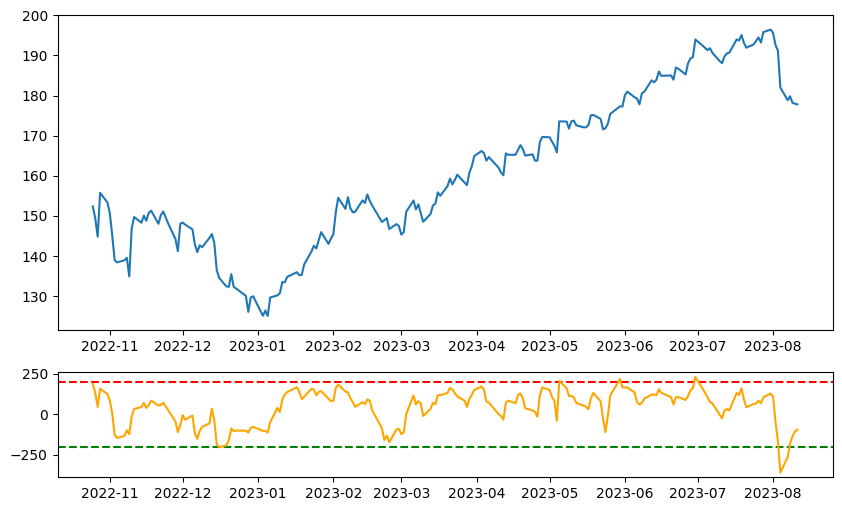

In [21]:
fig, axs = plt.subplots(2, 1, gridspec_kw={"height_ratios":[3,1]}, figsize=(10, 6))

axs[0].plot(historical_datas['AAPL']['close'].tail(200))
axs[1].axhline(y=200, color='r', linestyle='--')
axs[1].axhline(y=-200, color='g', linestyle='--')
axs[1].plot(historical_datas['AAPL']['CCI'].tail(200), color='orange')

In [22]:
historical_datas['AAPL']['CCI_signals'] = 'HOLD'  # Inicjalizacja sygnałów na 'HOLD'

cci_values = historical_datas['AAPL']['CCI']
cci_signals = []

#Dopisanie sygnałów do kolumny willr_signals
for cci in willr_values:
    if cci > 200 :
        cci_signals.append('BUY')
    elif cci < -200:
        cci_signals.append('SELL')
    else:
        cci_signals.append('HOLD')

historical_datas['AAPL']['CCI_signals'] = willr_signals

In [23]:
historical_datas['AAPL'].tail(50)

,open,high,low,close,adjclose,volume,ticker,RSI,RSI_signal,SMA100,EMA100,WillR,WillR_signal,CCI,CCI_signals
2023-06-01,177.699997,180.119995,176.929993,180.089996,180.089996,68901800,AAPL,71.373136,SELL,157.5576,161.188060,-0.309266,SELL,163.778062,SELL
2023-06-02,181.029999,181.779999,179.259995,180.949997,180.949997,61945900,AAPL,72.629679,SELL,158.0656,161.579386,-7.306354,SELL,164.273302,SELL
2023-06-05,182.630005,184.949997,178.039993,179.580002,179.580002,121946500,AAPL,67.543493,HOLD,158.5541,161.935834,-36.957987,HOLD,133.439663,HOLD
2023-06-06,179.970001,180.119995,177.429993,179.210007,179.210007,64848400,AAPL,66.195255,HOLD,159.0113,162.277896,-39.504410,HOLD,72.356608,HOLD
2023-06-07,178.440002,181.210007,177.320007,177.820007,177.820007,61944600,AAPL,61.248905,HOLD,159.4554,162.585661,-49.410903,HOLD,59.065615,HOLD
2023-06-08,177.899994,180.839996,177.460007,180.570007,180.570007,50214900,AAPL,66.571016,HOLD,159.9135,162.941787,-30.353374,HOLD,69.382403,HOLD
2023-06-09,181.500000,182.229996,180.630005,180.960007,180.960007,48870700,AAPL,67.257805,HOLD,160.3637,163.298583,-27.650674,HOLD,94.997789,HOLD
2023-06-12,181.270004,183.889999,180.970001,183.789993,183.789993,54274900,AAPL,71.787304,SELL,160.8495,163.704354,-8.038837,SELL,119.811953,SELL
2023-06-13,182.800003,184.149994,182.440002,183.309998,183.309998,54929100,AAPL,70.018050,SELL,161.3299,164.092584,-11.365213,SELL,121.148898,SELL
2023-06-14,183.369995,184.389999,182.020004,183.949997,183.949997,57462900,AAPL,71.042818,SELL,161.7907,164.485800,-7.541481,SELL,116.749347,SELL
